<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-cluster_catalogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install git+https://github.com/jpdeleon/chronos.git@master

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## Hao+2022

In [3]:
#initialize
cc = cr.ClusterCatalog(catalog_name='Hao2022')
cc

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/660/A4


ClusterCatalog(catalog_name=Hao2022)

In [4]:
df = cc.query_catalog()
df.head()

Using Hao2022 catalog.


,Cluster,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,GLON,e_GLON,GLAT,e_GLAT,adeg,...,e_age,AG,Z,RV,s_RV,N,o_RV,ra,dec,distance
0,OC-0001,267.981796,0.027433,-27.851308,0.019313,1.644622,0.021793,-0.629447,0.022055,0.031006,...,0.17,3.22,0.028,NaN,NaN,17,0,267.981792,-27.851309,2882.425850
1,OC-0002,263.377750,0.068219,-25.019992,0.045327,1.887284,0.050364,4.365118,0.057918,0.076753,...,0.18,3.72,0.028,-12.260829,NaN,33,1,263.377744,-25.019991,1223.322397
2,OC-0003,270.241890,0.034381,-24.870192,0.034047,5.239749,0.037631,-0.881702,0.026765,0.046179,...,0.20,2.56,0.028,NaN,NaN,16,0,270.241885,-24.870191,1830.351995
3,OC-0004,270.678504,0.024258,-24.261303,0.027998,5.965418,0.023713,-0.925977,0.026662,0.035681,...,0.15,1.38,0.016,NaN,NaN,17,0,270.678495,-24.261295,1319.139393
4,OC-0005,271.798880,0.031469,-24.728354,0.034868,6.057161,0.038092,-2.043646,0.024160,0.045108,...,0.19,3.46,0.028,3.358612,NaN,20,1,271.798877,-24.728351,1810.174265


In [5]:
df.columns

Index(['Cluster', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'GLON',
       'e_GLON', 'GLAT', 'e_GLAT', 'adeg', 'parallax', 'e_parallax', 'pmra',
       'e_pmra', 'pmdec', 'e_pmdec', 'log10_age', 'e_age', 'AG', 'Z', 'RV',
       's_RV', 'N', 'o_RV', 'ra', 'dec', 'distance'],
      dtype='object')

In [6]:
cc.all_clusters.sort_values(by='log10_age')[['Cluster','log10_age','distance']].head(10)

,Cluster,log10_age,distance
148,OC-0149,6.0,1787.265377
30,OC-0031,6.0,2046.240953
439,OC-0440,6.0,14296.947602
687,OC-0688,6.0,1805.210560
681,OC-0682,6.0,5889.385560
222,OC-0223,6.0,720.292958
50,OC-0051,6.0,1944.927435
291,OC-0292,6.0,1729.451522
62,OC-0063,6.0,3131.850924
63,OC-0064,6.0,1852.023335


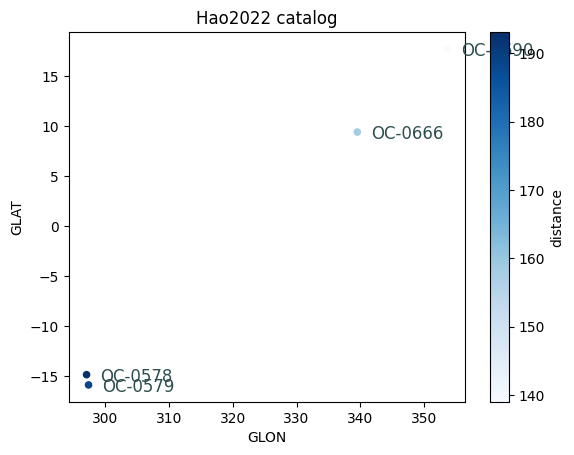

In [7]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='GLON', y='GLAT', c='distance');

In [8]:
mem=cc.query_catalog(return_members=True)

Using Hao2022 catalog.


In [9]:
g=mem.groupby(by='Cluster')
g.count().sort_values(by='radial_velocity', ascending=False)

,source_id,RA_ICRS,DE_ICRS,GLON,GLAT,parallax,pmra,pmdec,radial_velocity,e_radial_velocity,Gmag,BP-RP,ra,dec,distance
Cluster,,,,,,,,,,,,,,,
OC-0066,31,31,31,31,31,31,31,31,8,8,31,31,31,31,31
OC-0067,25,25,25,25,25,25,25,25,8,8,25,25,25,25,25
OC-0150,124,124,124,124,124,124,124,124,7,7,124,124,124,124,124
OC-0347,217,217,217,217,217,217,217,217,7,7,217,211,217,217,217
OC-0011,289,289,289,289,289,289,289,289,6,6,289,287,289,289,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OC-0257,15,15,15,15,15,15,15,15,0,0,15,15,15,15,15
OC-0256,19,19,19,19,19,19,19,19,0,0,19,19,19,19,19
OC-0255,15,15,15,15,15,15,15,15,0,0,15,15,15,15,15


## He+2022b

In [10]:
#initialize
cc = cr.ClusterCatalog(catalog_name='He2022b')
cc

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/262/7


ClusterCatalog(catalog_name=He2022b)

In [11]:
df = cc.query_catalog()
df.head()

Using He2022b catalog.


,Cluster,GLON,e_GLON,GLAT,e_GLAT,Num,parallax,e_plx,pmra,e_pmra,pmdec,e_pmdec,log10_age,A0,ra,dec,distance
0,Alessi_1,123.2631,0.118,-13.3595,0.100,46,1.411,0.036,6.476,0.105,-6.420,0.155,8.70,0.60,13.3557,49.5110,708.717222
1,Alessi_10,31.6259,0.272,-21.0414,0.169,81,2.260,0.046,1.447,0.173,-7.898,0.214,7.90,0.60,301.2290,-10.5241,442.477876
2,Alessi_12,67.4483,0.400,-11.4755,0.357,198,1.837,0.047,4.315,0.193,-4.701,0.155,7.90,0.35,310.9106,23.7975,544.365814
3,Alessi_13,237.2373,2.393,-55.7144,1.100,66,9.535,0.299,36.141,1.600,-4.606,0.985,7.50,0.05,52.0532,-35.6693,104.876770
4,Alessi_19,40.0609,0.278,12.6327,0.177,43,1.691,0.039,-1.000,0.134,-7.180,0.144,7.25,0.30,274.6656,11.9759,591.366056


In [12]:
mem=cc.query_catalog(return_members=True)

Using He2022b catalog.


In [13]:
mem.columns

Index(['source_id', 'GLON', 'GLAT', 'parallax', 'e_parallax', 'pmra', 'e_pmra',
       'pmdec', 'e_pmdec', 'RUWE', 'Gmag', 'BP-RP', 'nre', 'Cluster', 'ra',
       'dec', 'distance'],
      dtype='object')

## He+2022a

In [14]:
#initialize
cc = cr.ClusterCatalog(catalog_name='He2022a')
cc

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/260/8


ClusterCatalog(catalog_name=He2022a)

In [15]:
df = cc.query_catalog()
df.head()

Using He2022a catalog.


,Cluster,GLON,s_GLON,GLAT,s_GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,...,AG,log10_age,Z,N70,minProb,NminProb,Class,ra,dec,distance
0,Cluster_1,346.147,0.06,-2.132,0.06,0.60,0.06,-0.03,0.12,-3.58,...,2.60,8.3,0.008,115,0.70,115,1,259.2575,-41.6921,1666.666667
1,Cluster_2,283.662,0.61,-11.431,0.22,1.39,0.04,-9.45,0.14,5.90,...,0.45,7.7,0.036,24,1.00,24,1,140.0578,-66.0403,719.424460
2,Cluster_3,131.435,0.20,3.074,0.19,1.28,0.03,-2.42,0.09,-1.06,...,1.45,7.6,0.006,48,0.96,48,1,32.9997,64.6075,781.250000
3,Cluster_4,348.551,0.05,-0.988,0.06,0.60,0.04,0.99,0.12,-1.14,...,2.60,8.4,0.030,55,0.73,55,1,259.8456,-39.0686,1666.666667
4,Cluster_5,176.325,0.24,-10.221,0.17,2.27,0.12,1.27,0.17,-5.95,...,1.20,6.8,0.022,26,0.40,30,1,74.5512,26.1923,440.528634


In [16]:
mem=cc.query_catalog(return_members=True)

Using He2022a catalog.


In [17]:
mem.columns

Index(['Seq', 'source_id', 'GLON', 'GLAT', 'parallax', 'e_parallax', 'pmra',
       'e_pmra', 'pmdec', 'e_pmdec', 'Gmag', 'BP-RP', 'radial_velocity',
       'e_radial_velocity', 'Pcl', 'Cluster', 'ra', 'dec', 'distance'],
      dtype='object')

In [18]:
g=mem.groupby(by='Cluster')
g.count().sort_values(by='radial_velocity', ascending=False)

,Seq,source_id,GLON,GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,e_pmdec,Gmag,BP-RP,radial_velocity,e_radial_velocity,Pcl,ra,dec,distance
Cluster,,,,,,,,,,,,,,,,,,
Cluster_347,360,360,360,360,360,360,360,360,360,360,360,346,28,28,360,360,360,360
Cluster_343,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1182,1172,27,27,1182,1182,1182,1182
Cluster_499,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2393,21,21,2422,2422,2422,2422
Cluster_286,991,991,991,991,991,991,991,991,991,991,991,973,19,19,991,991,991,991
Cluster_160,921,921,921,921,921,921,921,921,921,921,921,916,17,17,921,921,921,921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cluster_239,131,131,131,131,131,131,131,131,131,131,131,131,0,0,131,131,131,131
Cluster_238,42,42,42,42,42,42,42,42,42,42,42,40,0,0,42,42,42,42
Cluster_441,87,87,87,87,87,87,87,87,87,87,87,87,0,0,87,87,87,87


Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/260/8
Using He2022a catalog.


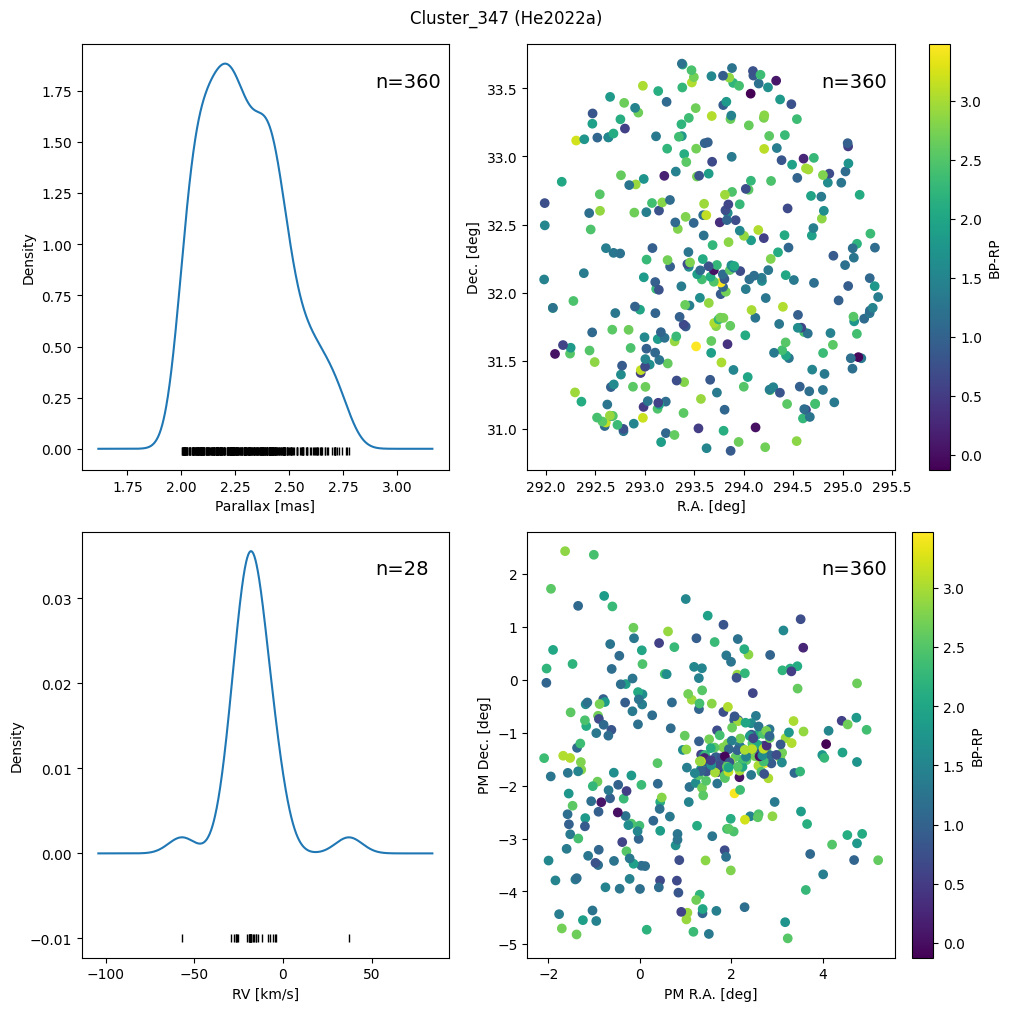

In [19]:
c=cr.Cluster(cluster_name="Cluster_347", catalog_name="He2022a")
fig=c.plot_rdp_pmrv(color='BP-RP')

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/260/8
Using He2022a catalog.


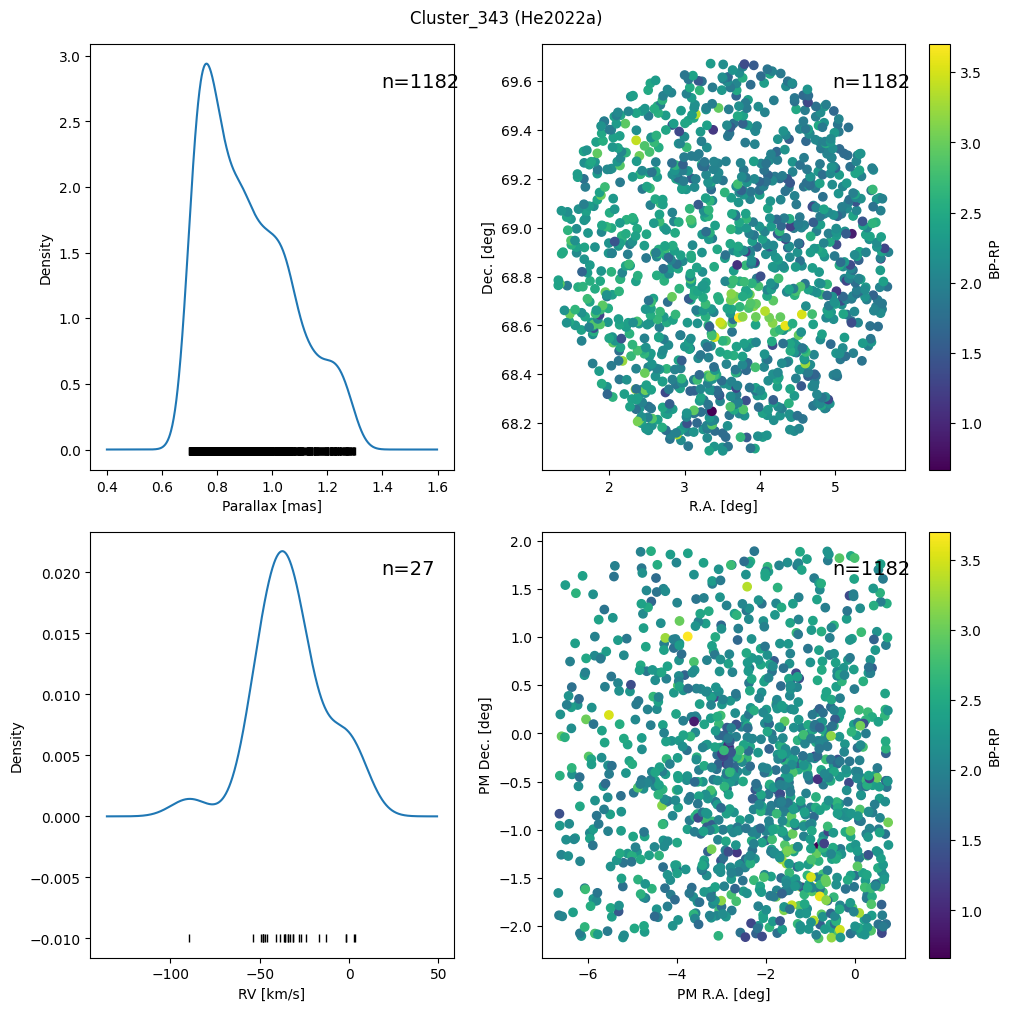

In [20]:
c=cr.Cluster(cluster_name="Cluster_343", catalog_name="He2022a")
fig=c.plot_rdp_pmrv(color='BP-RP')

## Castro-Ginard+2022

In [21]:
cc = cr.ClusterCatalog(catalog_name="CastroGinard2022")
cc.get_vizier_url()

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/661/A118


'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/661/A118'

In [22]:
df = cc.query_catalog()
df.head()

Using CastroGinard2022 catalog.


,Seq,Cluster,raJ2015,e_raJ2015,decJ2015,e_decJ2015,GLON,s_GLON,GLAT,s_GLAT,...,e_radial_velocity,Nmemb,NmembRV,Flag,logAge,Dist,AV,ra,dec,distance
0,0,UBC1001,267.36,0.10,-29.23,0.04,0.18,0.05,-0.86,0.08,...,NaN,29,0,a,7.464,2786.0,1.914,267.36,-29.23,2702.702703
1,1,UBC1002,268.11,0.05,-28.20,0.07,1.40,0.06,-0.90,0.05,...,NaN,71,1,NaN,8.339,3233.0,2.314,268.11,-28.20,3571.428571
2,2,UBC1003,268.60,0.05,-24.89,0.05,4.48,0.05,0.40,0.05,...,NaN,44,0,NaN,7.782,2809.0,2.659,268.60,-24.89,2564.102564
3,3,UBC1004,270.56,0.07,-25.07,0.06,5.21,0.07,-1.23,0.06,...,2.12,418,2,NaN,8.497,2436.0,2.318,270.56,-25.07,2631.578947
4,4,UBC1005,272.18,0.06,-21.42,0.08,9.12,0.08,-0.75,0.06,...,NaN,31,0,a,7.371,1542.0,1.230,272.18,-21.42,1515.151515


In [23]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CastroGinard2022 catalog.


,Seq,Cluster,source_id,raJ2015,decJ2015,GLON,GLAT,parallax,pmra,pmdec,RV,Gmag,BP-RP,ra,dec,distance
0,0,UBC1001,4057224024226708992,267.525044,-29.364191,0.139327,-1.058598,0.367668,0.429,-1.939,NaN,14.143807,1.114144,267.525042,-29.364182,2719.845651
1,1,UBC1001,4057230174598255232,267.567029,-29.305336,0.208635,-1.059843,0.363644,0.453,-1.929,NaN,16.556490,1.466582,267.567027,-29.305328,2749.941273
2,2,UBC1001,4057237115289677184,267.488406,-29.267053,0.206327,-0.981341,0.382895,0.479,-1.878,NaN,16.589193,1.633885,267.488404,-29.267045,2611.684156
3,3,UBC1001,4057239344344064256,267.284129,-29.270346,0.111911,-0.830168,0.353141,0.405,-1.848,NaN,13.447580,0.924681,267.284127,-29.270338,2831.729706
4,4,UBC1001,4057239657910636672,267.275512,-29.228923,0.143560,-0.802402,0.352058,0.308,-1.801,NaN,13.205015,0.924160,267.275510,-29.228915,2840.442538


In [24]:
df.shape, mem.shape

((628, 27), (25466, 16))

## Castro-Ginard+2020

In [25]:
cc = cr.ClusterCatalog(catalog_name="CastroGinard2020")
cc.get_vizier_url()

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/635/A45


'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/635/A45'

In [26]:
df = cc.query_catalog()
df.head()

Using CastroGinard2020 catalog.


,Cluster,raJ2015,e_raJ2015,decJ2015,e_decJ2015,GLON,e_GLON,GLAT,e_GLAT,parallax,e_parallax,pmra,e_pmra,pmdec,e_pmdec,Note,ra,dec,distance
0,UBC91,267.422115,0.065554,-28.758976,0.071580,0.612577,0.073082,-0.670725,0.055549,0.4223,0.0303,-0.587,0.086,-1.125,0.108,NaN,267.422118,-28.758971,2367.984845
1,UBC92,269.883766,0.066903,-26.654850,0.064310,3.530048,0.067889,-1.487720,0.055725,0.3753,0.0392,2.125,0.091,0.406,0.091,NaN,269.883756,-26.654852,2664.535039
2,UBC93,268.572762,0.047172,-25.390401,0.049090,4.032690,0.041700,0.165784,0.049871,0.3386,0.0268,-0.931,0.107,-1.884,0.093,NaN,268.572766,-25.390393,2953.337271
3,UBC94,269.632548,0.087937,-24.636463,0.101501,5.167222,0.100890,-0.285417,0.080697,0.7481,0.0142,-1.659,0.070,-4.453,0.065,NaN,269.632555,-24.636444,1336.719690
4,UBC95,268.247383,0.064333,-22.165200,0.092335,6.662646,0.088510,2.057099,0.065199,0.4931,0.0269,-0.150,0.127,-1.280,0.113,NaN,268.247384,-22.165195,2027.986210


In [27]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CastroGinard2020 catalog.


,source_id,raJ2015,decJ2015,GLON,GLAT,parallax,pmra,pmdec,RV,Gmag,BP-RP,Cluster,ra,dec,distance
0,4057409601216233344,267.419190,-28.731717,0.634657,-0.654507,0.3895,-0.587,-0.996,NaN,14.019765,0.816364,UBC91,267.419193,-28.731713,2567.394095
1,4057301982142373376,267.444544,-28.885133,0.514432,-0.752373,0.4459,-0.421,-1.092,NaN,15.957764,1.487206,UBC91,267.444546,-28.885128,2242.655304
2,4057315107562619392,267.312894,-28.816109,0.514362,-0.617984,0.4506,-0.559,-1.208,NaN,15.996496,1.294818,UBC91,267.312897,-28.816104,2219.263205
3,4057397575306886400,267.442554,-28.767142,0.614784,-0.690278,0.4423,-0.595,-0.995,NaN,15.387901,1.099888,UBC91,267.442557,-28.767138,2260.908885
4,4057397540918327296,267.433707,-28.779738,0.599993,-0.690095,0.4475,-0.576,-1.229,NaN,16.502977,1.320338,UBC91,267.433710,-28.779733,2234.636872


In [28]:
df.shape, mem.shape

((570, 19), (33635, 15))

## Castro-Ginard+2019

In [29]:
cc = cr.ClusterCatalog(catalog_name="CastroGinard2019")
cc.get_vizier_url()

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/627/A35


'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/627/A35'

In [30]:
df = cc.query_catalog()
df.head()

Using CastroGinard2019 catalog.


,Cluster,raJ2015,e_raJ2015,decJ2015,e_decJ2015,GLON,e_GLON,GLAT,e_GLAT,parallax,e_Plx,pmRA_,e_pmRA_,pmdec,e_pmdec,ra,dec,distance
0,UBC33,7.394417,0.178692,60.491165,0.083802,120.241038,0.088703,-2.266201,0.083161,0.626200,0.030024,-0.939885,0.086550,-0.456,0.062296,7.394425,60.491167,1596.933963
1,UBC34,11.804234,0.218689,66.753464,0.149198,122.514547,0.086261,3.885277,0.149345,1.553352,0.043696,-5.016867,0.310292,-3.096,0.355859,11.804289,66.753477,643.768889
2,UBC35,15.095091,0.112399,55.411167,0.085636,124.211622,0.065036,-7.438306,0.085125,0.785708,0.045186,-4.463749,0.202482,-1.941,0.146563,15.095125,55.411175,1272.737244
3,UBC36,16.470356,0.061778,59.637643,0.057229,124.759019,0.031463,-3.182843,0.057121,0.465522,0.036993,-1.212531,0.187512,-0.462,0.142125,16.470366,59.637645,2148.127897
4,UBC37,20.947962,0.378867,70.582678,0.119143,125.638546,0.128304,7.881516,0.118023,1.334443,0.062159,-6.133094,0.363094,2.085,0.266199,20.948042,70.582669,749.376219


In [31]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CastroGinard2019 catalog.


,source_id,raJ2015,decJ2015,GLON,GLAT,parallax,pmRA_,pmdec,RV,Gmag,BP-RP,Cluster,ra,dec,distance
0,428632792645221760,7.400521,60.514566,120.246030,-2.243260,0.651464,-0.987376,-0.362,NaN,12.663068,0.933441,UBC33,7.400530,60.514567,1535.003695
1,428631899292045440,7.494622,60.503722,120.291315,-2.257957,0.627265,-0.988620,-0.466,NaN,14.541118,1.053961,UBC33,7.494631,60.503724,1594.221546
2,428630383156838016,7.398641,60.413040,120.236495,-2.344342,0.639726,-0.806818,-0.442,NaN,12.398151,0.639879,UBC33,7.398648,60.413042,1563.169036
3,428630834140163584,7.333766,60.474248,120.209807,-2.280628,0.606291,-0.958046,-0.519,NaN,15.173324,1.247709,UBC33,7.333774,60.474251,1649.372828
4,428637259411238016,7.047023,60.437977,120.065659,-2.304318,0.683495,-1.005962,-0.476,NaN,16.184393,1.303592,UBC33,7.047032,60.437979,1463.067958


In [32]:
df.shape, mem.shape

((53, 18), (2793, 15))

## Cantat-Gaudin+2020

In [33]:
#initialize
cc = cr.ClusterCatalog(catalog_name='CantatGaudin2020')
cc

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A99


ClusterCatalog(catalog_name=CantatGaudin2020)

In [34]:
#info
cc.get_vizier_url()

'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A99'

In [35]:
df = cc.query_catalog()
df.head()

Using CantatGaudin2020 catalog.


,Cluster,raJ2015,decJ2015,GLON,GLAT,r50,Nstars,pmra,pmdec,parallax,distance,X,Y,Z,Rgc,ra,dec
0,ASCC_10,51.870,34.981,155.723,-17.770,0.558,71,-1.737,-1.368,1.459,685.400960,-583.3,263.1,-205.1,8927.2,51.870,34.981
1,ASCC_101,288.399,36.369,68.028,11.608,0.372,75,0.934,1.288,2.488,401.929260,145.6,360.9,79.9,8202.3,288.399,36.369
2,ASCC_105,295.548,27.366,62.825,2.063,0.648,127,1.464,-1.635,1.783,560.852496,251.8,490.5,19.9,8103.0,295.548,27.366
3,ASCC_107,297.164,21.987,58.904,-1.901,0.174,59,-0.155,-5.156,1.109,901.713255,453.5,751.9,-29.2,7922.3,297.164,21.987
4,ASCC_108,298.306,39.349,74.378,6.074,0.537,230,-0.519,-1.690,0.838,1193.317422,309.0,1105.1,122.1,8106.7,298.306,39.349


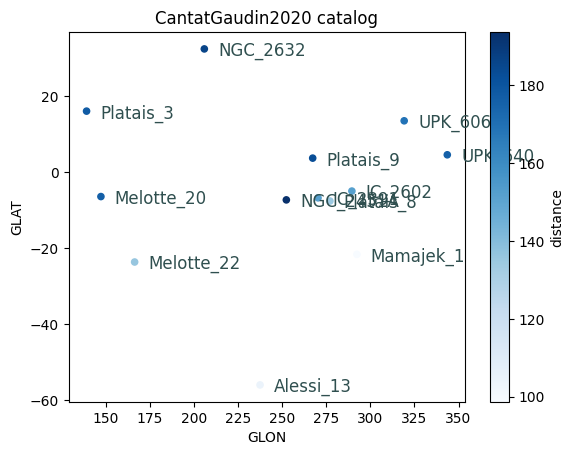

In [36]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='GLON', y='GLAT', c='distance');

In [37]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CantatGaudin2020 catalog.


,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,BP-RP,Proba,Cluster,ra,dec,distance
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.0581,0.9138,0.8,ASCC_10,52.756566,34.689536,724.690195
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.7757,1.2807,0.6,ASCC_10,52.730275,34.341469,604.229607
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.8832,0.7241,0.1,ASCC_10,52.684358,34.003604,629.881582
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.8798,1.8380,0.7,ASCC_10,52.676114,34.733694,641.601437
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.9800,2.2854,0.6,ASCC_10,52.712107,34.578009,705.566923


In [38]:
mem=cc.query_catalog(return_members=True)

Using CantatGaudin2020 catalog.


In [39]:
g=mem.groupby(by='Cluster')
g.count().sort_values(by='radial_velocity', ascending=False)

,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,BP-RP,Proba,ra,dec,distance
Cluster,,,,,,,,,,,,,
NGC_3532,1981,1981,1981,1981,1981,1981,237,1981,1944,1981,1981,1981,1981
Melotte_22,1061,1061,1061,1061,1061,1061,230,1061,1046,1061,1061,1061,1061
NGC_2632,719,719,719,719,719,719,194,719,715,719,719,719,719
Stock_2,1209,1209,1209,1209,1209,1209,194,1209,1199,1209,1209,1209,1209
NGC_6475,1555,1555,1555,1555,1555,1555,168,1555,1477,1555,1555,1555,1555
...,...,...,...,...,...,...,...,...,...,...,...,...,...
UBC_27,65,65,65,65,65,65,0,65,65,65,65,65,65
Pfleiderer_3,73,73,73,73,73,73,0,73,72,73,73,73,64
FSR_0985,101,101,101,101,101,101,0,101,101,101,101,101,101


## Cantat-Gaudin+2018

In [40]:
cc = cr.ClusterCatalog(catalog_name="CantatGaudin2018")
cc.get_vizier_url()

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/618/A93


'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/618/A93'

In [41]:
df = cc.query_catalog()
df.head()

Using CantatGaudin2018 catalog.


,Cluster,ra,dec,GLON,GLAT,r50,Nstars,pmra,pmdec,parallax,distance,X,Y,Z,Rgc
0,ASCC_10,51.870,34.981,155.723,-17.770,0.558,71,-1.737,-1.368,1.459,685.400960,-583.3,263.1,-205.1,8927.2
1,ASCC_101,288.399,36.369,68.028,11.608,0.372,75,0.934,1.288,2.488,401.929260,145.6,360.9,79.9,8202.3
2,ASCC_105,295.548,27.366,62.825,2.063,0.648,127,1.464,-1.635,1.783,560.852496,251.8,490.5,19.9,8103.0
3,ASCC_107,297.164,21.987,58.904,-1.901,0.174,59,-0.155,-5.156,1.109,901.713255,453.5,751.9,-29.2,7922.3
4,ASCC_108,298.306,39.349,74.378,6.074,0.537,230,-0.519,-1.690,0.838,1193.317422,309.0,1105.1,122.1,8106.7


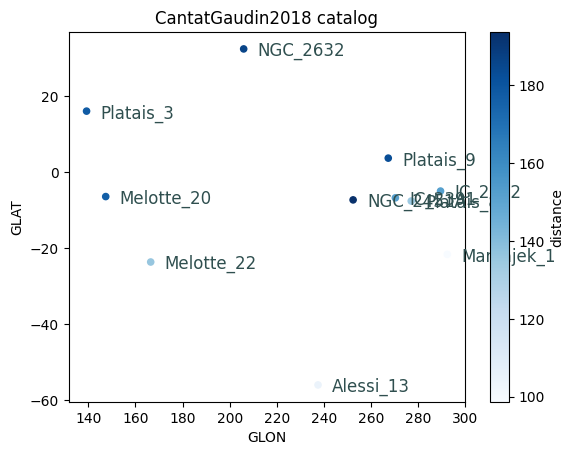

In [42]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='GLON', y='GLAT', c='distance');

In [43]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using CantatGaudin2018 catalog.


,raJ2015,decJ2015,source_id,GLON,GLAT,parallax,pmra,pmdec,phot_g_n_obs,Gmag,BP-RP,PMemb,Cluster,ra,dec,distance
0,301.229391,-11.186849,4190669036038417152,30.982256,-21.322445,2.1358,1.268,-8.560,348,14.804825,1.412944,0.7,Alessi_10,301.229385,-11.186812,468.208634
1,301.014346,-11.419202,4190657903483144960,30.660791,-21.229051,2.2071,1.136,-8.043,331,17.350530,2.605459,1.0,Alessi_10,301.014341,-11.419167,453.083231
2,300.801432,-11.195500,4190723255705770240,30.783967,-20.945461,2.0438,1.259,-8.064,329,12.473157,0.865277,0.8,Alessi_10,300.801426,-11.195466,489.284666
3,301.006976,-11.037219,4190732120518267776,31.028893,-21.061430,2.3256,1.189,-8.100,301,16.400896,1.935030,1.0,Alessi_10,301.006971,-11.037184,429.996560
4,301.678011,-10.865093,4190774206899418880,31.495512,-21.585570,2.2585,1.598,-7.630,322,17.435835,2.370981,1.0,Alessi_10,301.678004,-10.865060,442.771751


In [44]:
df.shape, mem.shape

((1229, 15), (401448, 16))

## Bossini+2019

In [45]:
cc = cr.ClusterCatalog(catalog_name="Bossini2019")
cc.get_vizier_url()

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/623/A108/tablea


'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/623/A108/tablea'

In [46]:
df = cc.query_catalog()
df.head()

Using Bossini2019 catalog.


,Cluster,ra,dec,log10_age,e_logA,E_logA,dist_mod,dist_mod_e1,dist_mod_e2,AV,e_AV,E_AV,AGTO,e_AGTO,E_AGTO,Fe_H,r_Fe_H,distance
0,Blanco_1,0.853,-29.958,7.975,7.998,7.943,6.876,6.876,6.876,0.031,0.031,0.031,0.030,0.030,0.030,0.00,HRS,237.246602
1,IC_2391,130.292,-52.991,7.561,7.583,7.540,5.908,5.908,5.908,0.093,0.093,0.093,0.091,0.091,0.091,0.00,HRS,151.914770
2,IC_2602,160.613,-64.426,7.547,7.563,7.533,5.914,5.914,5.914,0.096,0.096,0.096,0.094,0.094,0.094,0.00,HRS,152.335106
3,IC_2714,169.373,-62.719,8.550,8.550,8.550,10.711,10.720,10.704,0.991,1.000,0.984,0.967,0.976,0.960,0.02,HRS,1387.394601
4,IC_4665,266.554,5.615,7.581,7.636,7.550,7.450,7.495,7.395,0.397,0.430,0.364,0.388,0.420,0.355,-0.03,HRS,309.029543


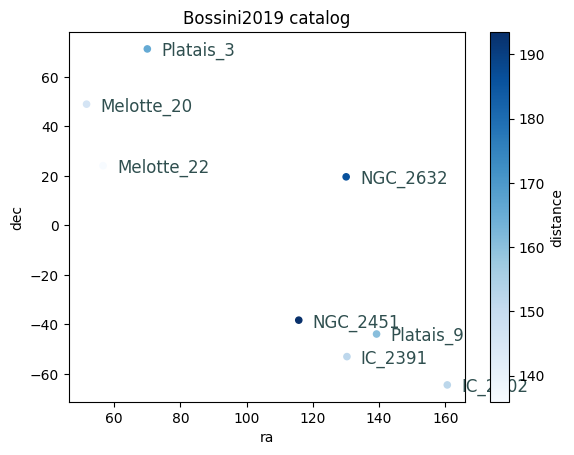

In [47]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='ra', y='dec', c='distance');

## Babusiaux+2018

In [55]:
cc = cr.ClusterCatalog(catalog_name="Babusiaux2018")
cc.get_vizier_url()

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/616/A10


'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/616/A10'

In [56]:
df = cc.query_catalog()
df.head()

Using Babusiaux2018 catalog.


,Nstars,Cluster,raJ2015,decJ2015,U,e_U,V,e_V,W,e_W,...,RV,e_RV,ra,dec,cc1,cc2,cc3,rMax,RV_n_obs,distance
0,740,alphaPer,52.06,49.06,-5.110,0.053,24.183,0.067,-14.122,0.097,...,-0.29,0.08,52.0598,49.0601,NaN,NaN,NaN,NaN,NaN,174.886324
1,489,Blanco1,0.72,-30.09,6.176,0.111,21.150,0.020,-0.296,0.065,...,5.78,0.10,0.7199,-30.0900,NaN,NaN,NaN,NaN,NaN,237.191651
2,153,ComaBer,185.98,26.09,-1.638,0.078,4.785,0.018,-3.528,0.040,...,-0.52,0.07,185.9801,26.0900,NaN,NaN,NaN,NaN,NaN,85.910653
3,515,Hyades,67.98,17.01,-6.059,0.031,45.691,0.069,5.544,0.025,...,39.96,0.06,67.9795,17.0101,NaN,NaN,NaN,NaN,NaN,47.501425
4,325,IC2391,130.29,-52.99,-0.751,0.054,28.459,0.062,-1.590,0.105,...,14.59,0.09,130.2902,-52.9901,NaN,NaN,NaN,NaN,NaN,151.584053


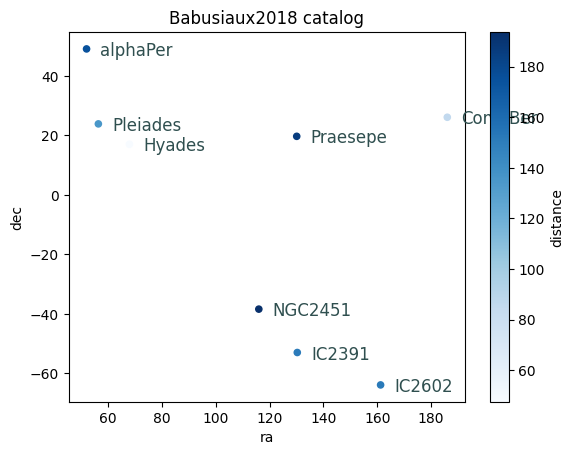

In [57]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<200]
fig = cc.plot_all_clusters(x='ra', y='dec', c='distance');

In [58]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using Babusiaux2018 catalog.


,source_id,Cluster,raJ2015,decJ2015,Gmag,parallax,e_plx,ra,dec
0,49520255665123328,Hyades,64.87461,21.75372,12.861,20.866,0.033,64.87410,21.75388
1,49729231594420096,Hyades,60.20378,18.19388,5.790,21.789,0.045,60.20319,18.19400
2,51383893515451392,Hyades,59.80696,20.42805,12.570,22.737,0.006,59.80634,20.42821
3,145373377272257664,Hyades,66.06127,21.73605,6.990,23.109,0.003,66.06072,21.73625
4,145391484855481344,Hyades,67.00371,21.61972,5.643,19.968,0.067,67.00326,21.61990


In [59]:
df.shape, mem.shape

((46, 32), (40903, 9))

## Bouma+2019

In [60]:
cc = cr.ClusterCatalog(catalog_name="Bouma2019")
cc.get_vizier_url()

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/245/13


'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/245/13'

In [61]:
df = cc.query_catalog()
df.head()

Using Bouma2019 catalog.
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



,Cluster,dec,distance,k13_e_logt,k13_logt,parallax,phot_bp_mean_mag,phot_g_mean_mag,phot_rp_mean_mag,pmdec,pmra,ra,count
0,118TAU,23.569544,106.242354,NaN,NaN,9.412442,13.518909,12.354570,11.282246,-28.354268,7.761713,82.427007,1
1,ABDMG,31.705265,45.836645,NaN,NaN,21.816606,14.296335,13.025639,11.763298,-100.307957,64.861784,56.561986,97
2,AH03_J0822-36.4,-36.407564,1858.138397,NaN,8.915,0.538181,16.184860,15.705580,15.055792,3.345756,-3.555434,125.517644,119
3,AH03_J1725-34.4,-34.411341,1714.096934,NaN,NaN,0.583398,15.837820,14.560573,13.435419,-2.348778,-1.038870,261.376282,3
4,AH03_J2011+26.7,26.725594,2147.299714,NaN,NaN,0.465701,16.392403,15.595353,14.680267,-3.585821,-2.188606,302.997192,11


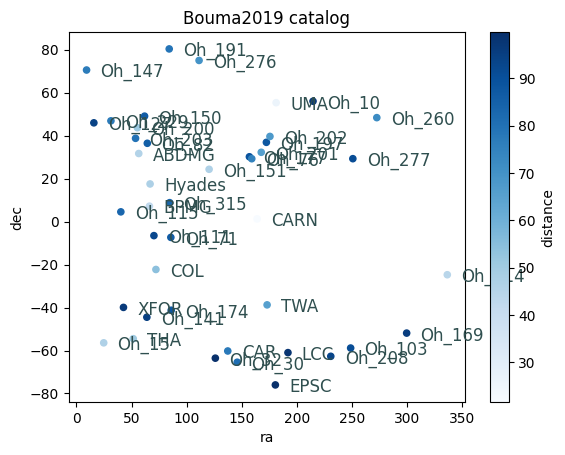

In [62]:
#plot clusters in catalog
cc.all_clusters = cc.all_clusters[cc.all_clusters['distance']<100]
fig = cc.plot_all_clusters(x='ra', y='dec', c='distance');

In [63]:
mem = cc.query_catalog(return_members=True)
mem.head()

Using Bouma2019 catalog.
Some parallaxes are negative in Bouma2019!
These are removed for the meantime.
For proper treatment, see:
https://arxiv.org/pdf/1804.09366.pdf



,source_id,clusters,reference,ext_catalog_name,ra,dec,pmra,pmdec,parallax,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,k13_name_match,Cluster,how_match,not_in_k13,comment,k13_logt,k13_e_logt,distance
0,915553884118144,NaN,Zari_2018_UMS,915553884118144,45.408172,2.168272,-5.332160,-4.481473,2.163371,9.071013,9.128693,8.993386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462.241463
1,1195551392247936,NaN,Zari_2018_UMS,1195551392247936,43.881549,2.018219,6.070629,-11.761800,6.101615,6.574962,6.582521,6.628116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163.891049
2,1402912413121792,NaN,Zari_2018_UMS,1402912413121792,44.375186,2.895904,7.408781,-14.308718,2.092020,10.367023,10.427338,10.212925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478.006813
3,1546703623466880,NaN,Zari_2018_UMS,1546703623466880,42.959304,2.920459,1.597504,1.721123,2.853298,10.033413,10.229258,9.744271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.471615
4,1939920764151808,NaN,Zari_2018_PMS,1939920764151808,45.599782,3.707654,2.253568,-8.906024,8.919021,14.358600,15.910364,13.139349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.119933


In [64]:
df.shape, mem.shape

((3216, 13), (1040410, 20))

## Grandjean+2020

In [65]:
cc = cr.ClusterCatalog(catalog_name="Grandjean2020")
cc.get_vizier_url()

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A44


'https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/633/A44'

In [66]:
df = cc.query_catalog()
df.head()

Using Grandjean2020 catalog.
Not cluster but young, nearby RV catalog


,Name,HIP,SpType,B-V,Mass,r_Mass,Age,e_Age,TBL,Nsp,RVAmp,RVrms,e_RV,BVS,BVSrms,ra,dec
0,HD105,490.0,G0V,0.600,1.10,2017A&A...603A...3V,45.0,10.0,4606,36,236.8,61.1,4.2,310.7,9.8,1.468937,-41.753068
1,HD984,1134.0,F7V,0.500,1.20,2017A&A...603A...3V,42.0,7.0,867,21,301.9,84.6,16.4,571.8,38.2,3.542721,-7.199115
2,HD987,1113.0,G8V,0.756,0.98,2013A&A...559A..83L,30.0,15.0,2621,19,502.6,116.8,2.5,393.6,6.4,3.470877,-74.688292
3,HD1466,1481.0,F8V,0.540,1.20,2017A&A...603A...3V,45.0,10.0,4400,19,135.8,39.6,7.4,189.8,17.6,4.608848,-63.477495
4,HD3221,2729.0,K4V,1.226,0.90,2010A&A...520A..15M,45.0,10.0,4014,5,4793.4,1794.3,68.6,3115.1,172.5,8.713341,-61.916147


## catalog CDS cross-match

I crossmatched different catalogs above with Gaia DR2 and Gaia EDR3 using [CDS XMatch service](http://cdsxmatch.u-strasbg.fr/xmatch?context1=vizier&table1=J/ApJS/262/7/members&context2=vizier&table2=).

In [ ]:
import pandas as pd

df=pd.read_csv("../chronos/data/star_clusters/CantatGaudin2020/CantatGaudin2020_gaia_dr2_params.csv")
df2=pd.read_csv("../chronos/data/star_clusters/CantatGaudin2020/CantatGaudin2020_gaia_edr3_params.csv")
df3=pd.read_csv("../chronos/data/star_clusters/CantatGaudin2020/CantatGaudin2020_gaia_dr3_params.csv")

In [ ]:
df.columns

In [ ]:
df2.columns

In [ ]:
df3.columns

In [ ]:
df.shape, df2.shape, df3.shape 

In [ ]:
(df.Source==df.source_id).sum()/df.shape[0]

In [ ]:
df.RV.dropna().shape, df.radial_velocity.dropna().shape

In [ ]:
(df2.Source==df2.source_id).sum()/df2.shape[0]

In [ ]:
df2.RV.dropna().shape

In [ ]:
c=cr.Cluster(cluster_name="Feibelman_1")
# fig=c.plot_rdp_pmrv(color='BP-RP')

## catalog comparison

In [ ]:
cc0 = cr.ClusterCatalog(catalog_name="CantatGaudin2020")
df0 = cc0.query_catalog()

In [ ]:
df0.sort_values(by="distance").head()

In [ ]:
cc1 = cr.ClusterCatalog(catalog_name="CastroGinard2020")
df1 = cc1.query_catalog()

In [ ]:
#far
df1.sort_values(by="distance").head()

In [ ]:
cc2 = cr.ClusterCatalog(catalog_name="CastroGinard2022")
df2 = cc2.query_catalog()

In [ ]:
#far
df2.sort_values(by="distance").head()

In [ ]:
cc3 = cr.ClusterCatalog(catalog_name="Hao2022")
df3 = cc3.query_catalog()

In [ ]:
df3.sort_values(by="distance").head()

In [ ]:
cc4 = cr.ClusterCatalog(catalog_name="He2022a")
df4 = cc4.query_catalog()

In [ ]:
#>200pc
df4.sort_values(by="distance").head()

In [ ]:
cc5 = cr.ClusterCatalog(catalog_name="He2022b")
df5 = cc5.query_catalog()

In [ ]:
#nearby
df5.sort_values(by="distance").head()

In [ ]:
ax = df0.plot.scatter(x='ra',y='dec', c='C5', label=f"{cc0.catalog_name} ({len(df0)})")
_ = df1.plot.scatter(x='ra',y='dec', c='C0', label=f"{cc1.catalog_name} ({len(df1)})", ax=ax)
_ = df2.plot.scatter(x='ra',y='dec', c='C1', label=f"{cc2.catalog_name} ({len(df2)})", ax=ax)
_ = df3.plot.scatter(x='ra',y='dec', c='C2', label=f"{cc3.catalog_name} ({len(df3)})", ax=ax)
_ = df4.plot.scatter(x='ra',y='dec', c='C3', label=f"{cc4.catalog_name} ({len(df4)})", ax=ax)
_ = df5.plot.scatter(x='ra',y='dec', c='C4', label=f"{cc5.catalog_name} ({len(df5)})", ax=ax)

In [ ]:
for cc in [cc0,cc1,cc2,cc3,cc4,cc5]:
#     d = cc.query_catalog()
    m = cc.query_catalog(return_members=True)
    print(d.shape, m.shape)